In [1]:
!which python

/Users/saiha/opt/anaconda3/envs/mnist-neural/bin/python


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Imports

In [3]:
#Standard Imports
import os

# Third-Party Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Local Impoprts

In [4]:
# Plotting configurations
sns.set()

# Load Data

In [5]:
df_train=pd.read_csv("digit-recognizer/train.csv")

In [6]:
df_test =pd.read_csv("digit-recognizer/test.csv")

In [7]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_train.iloc[0]

label       1
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 785, dtype: int64

In [10]:
df_train.iloc[0].values

array([  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [11]:
X_train=df_train.drop(columns="label")
Y_train=df_train["label"]

## Plot the data

In [12]:
X_train.iloc[0].values.shape

(784,)

In [13]:
np.sqrt(784)

28.0

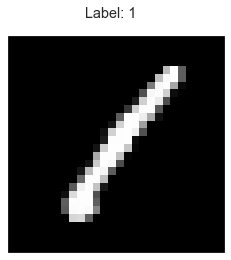

In [14]:
plt.imshow(X_train.iloc[0].values.reshape(28,28),cmap="gray")
plt.suptitle(f"Label: {Y_train.iloc[0]}")
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

In [15]:
def plot_image(pixel_row,label):
    plt.imshow(pixel_row.reshape(28,28),cmap="gray")
    plt.suptitle(f"Label: {label}")
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.show()

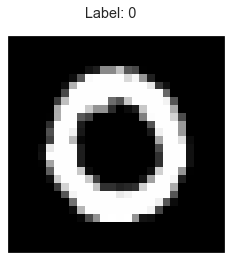

In [16]:
plot_image(X_train.iloc[1].values,Y_train.iloc[1])

In [28]:
def plot_ten_images_for_each_Class(X_train,Y_train):
    fig, axs = plt.subplots(10,10,figsize=(10,10))
    for val in range(10):
        images = X_train[Y_train == val].iloc[:10].values
        for i, image in enumerate(images):
            axs[0,i].imshow(image.reshape(28,28), cmap ="gray")
            axs[0,i].grid(False)
            axs[0,i].set_xticks([])
            axs[0,i].set_yticks([])
    plt.show()

In [ ]:
plot_ten_images_for_each_Class(X_train,Y_train)

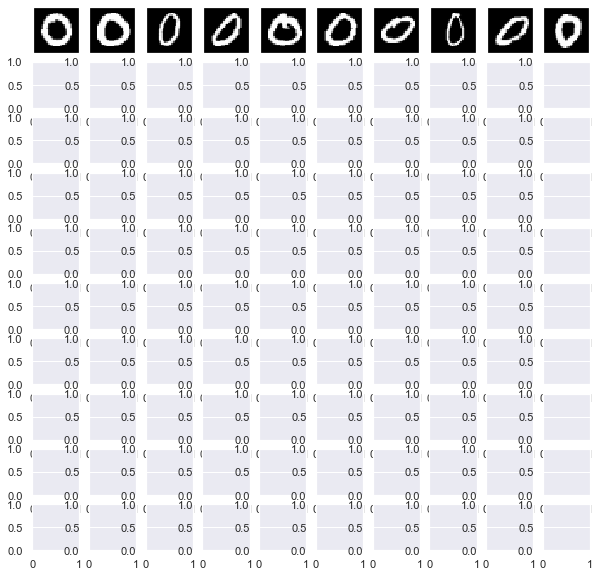

In [26]:
fig, axs = plt.subplots(10,10,figsize=(10,10))
images= X_train[Y_train == 0].iloc[:10].values
for i, image in enumerate(images):
    axs[0,i].imshow(image.reshape(28,28), cmap ="gray")
    axs[0,i].grid(False)
    axs[0,i].set_xticks([])
    axs[0,i].set_yticks([])